# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LinearRegression


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [4]:
df2 = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [8]:
df.Previous_Owners.value_counts()

1.000    14158
2.000     1172
0.000      554
3.000       29
4.000        2
Name: Previous_Owners, dtype: int64

In [9]:
# Check duplicates
df.duplicated().sum()

1673

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
# df["Gears"] = df.Gears.astype("O")
# df["Previous_Owners"] = df.Previous_Owners.astype("O")
# df["Inspection_new"] = df.Previous_Owners.astype("O")

# df.info()

In [14]:
df.describe(include="O").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [15]:
df.corr(numeric_only= True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


Detecting outliers

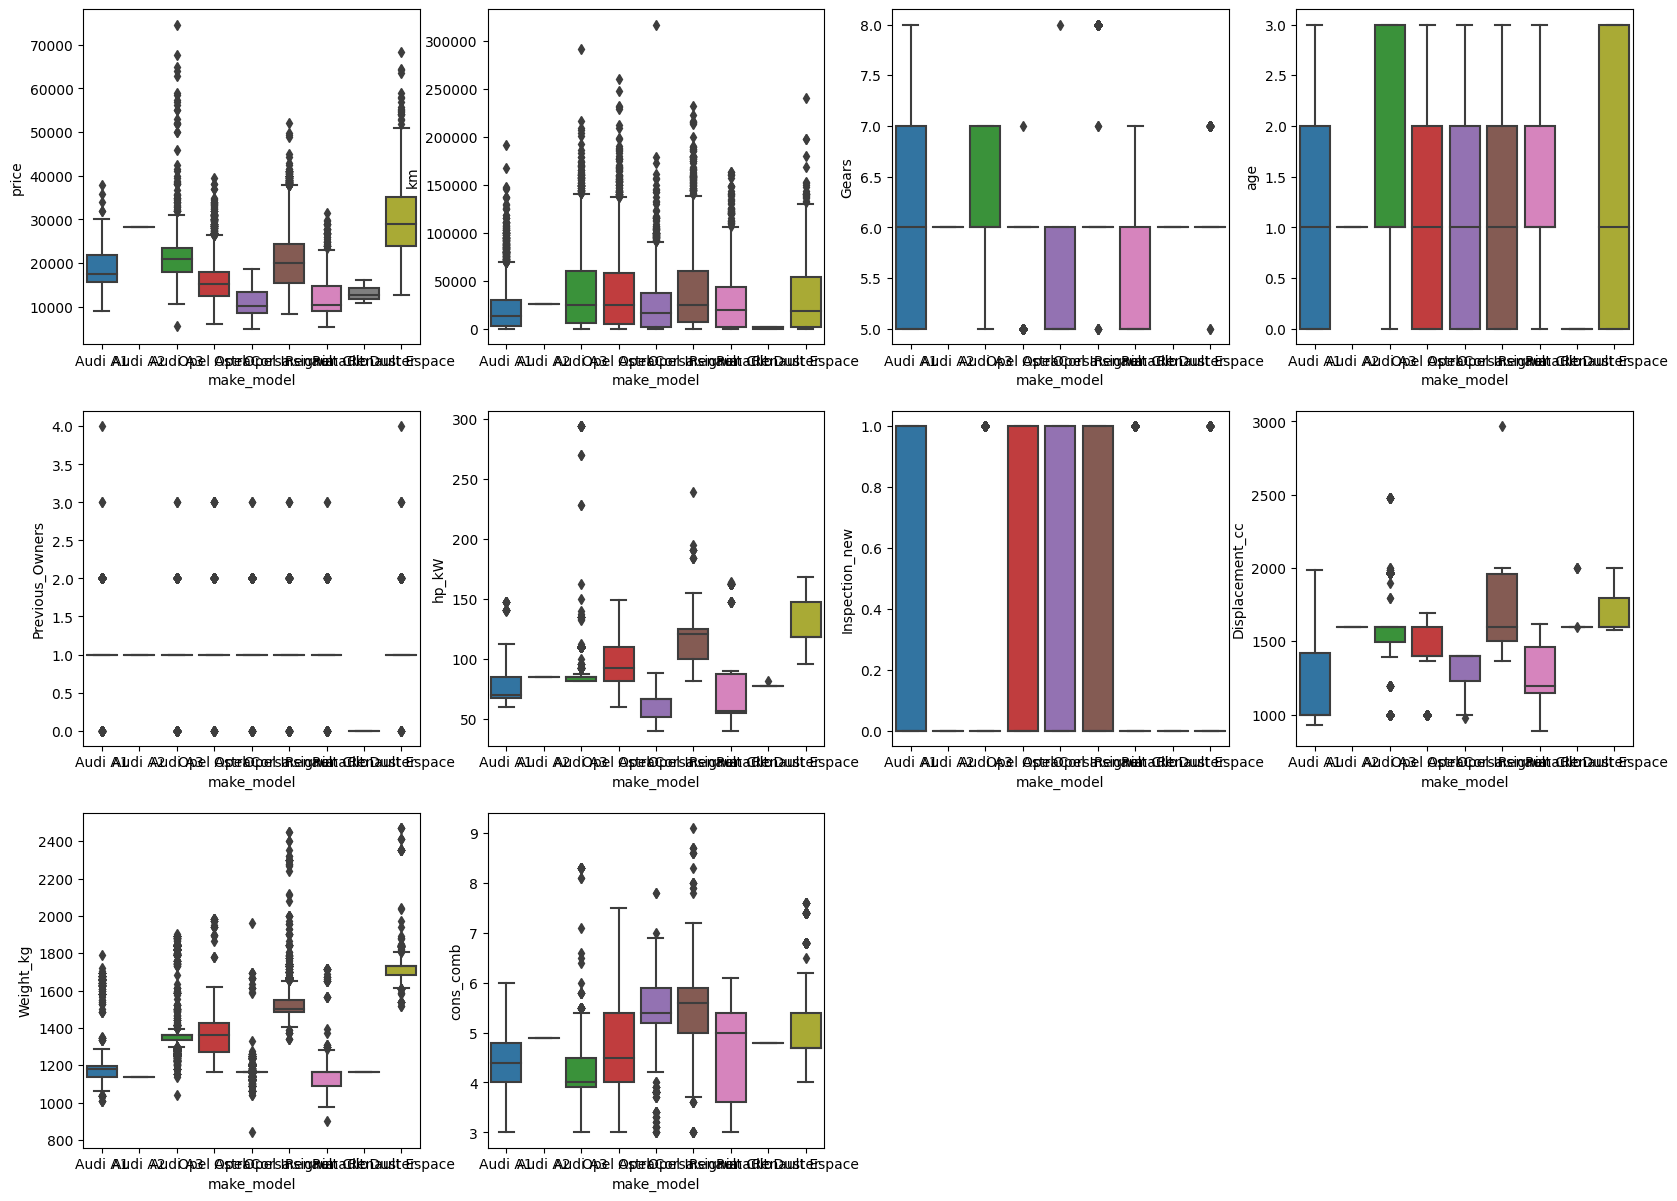

In [16]:
# Box plots

index = 0
plt.figure(figsize=(20,20))
for feature in df.select_dtypes("number"):
    if feature != "make_model":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='make_model',y=feature,data=df)

# from box plots, we can have same insight as the pair plot

<Axes: xlabel='make_model', ylabel='price'>

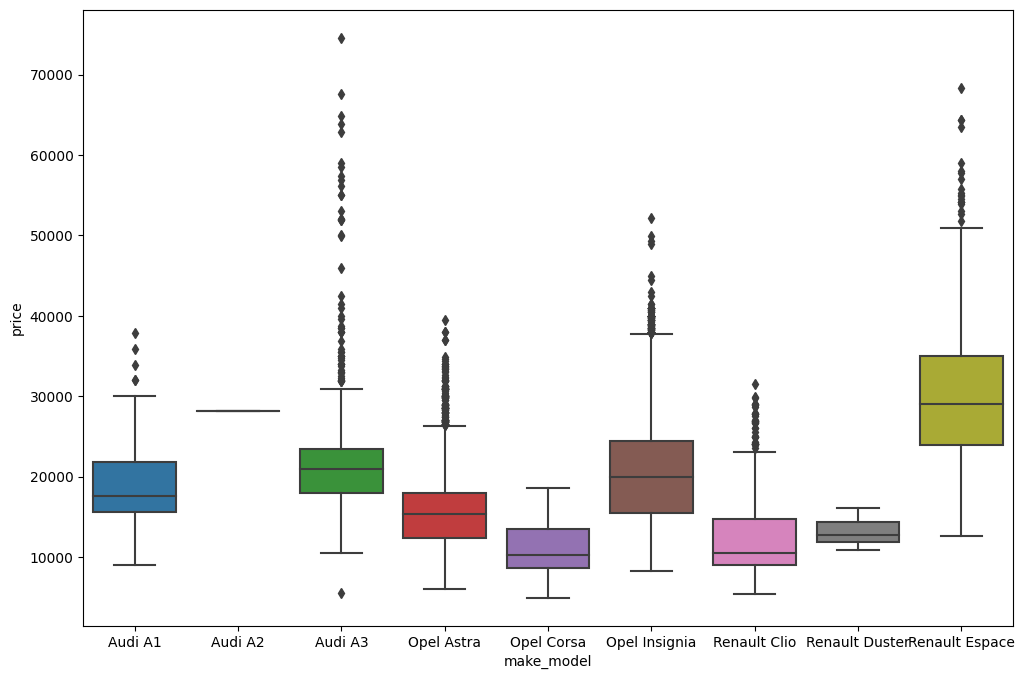

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,
                y="price",
                x="make_model",
               )

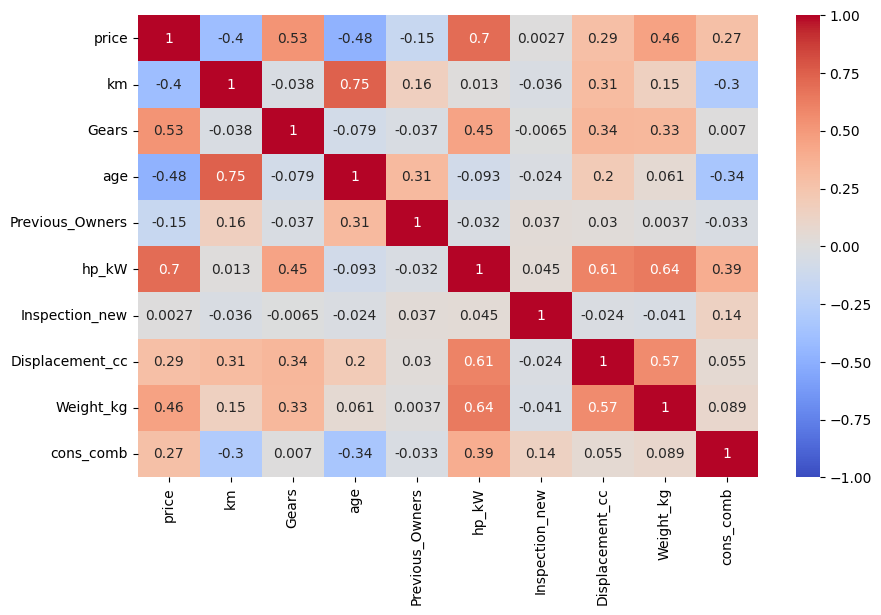

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

## VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# df_vif = df.copy()
# df_predictors = df.drop("sales", axis=1)
# predictors = df_predictors.columns



In [21]:
df.corr(numeric_only= True).columns.tolist()

['price',
 'km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [22]:
numeric_columns =  df.corr(numeric_only= True).columns.tolist()[1:]

In [23]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [24]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [25]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.438
1,Gears,55.935
2,age,6.812
3,Previous_Owners,11.584
4,hp_kW,25.389
5,Inspection_new,1.382
6,Displacement_cc,53.450
7,Weight_kg,71.404
8,cons_comb,30.188


In [26]:
numeric_columns.remove('Weight_kg')

In [27]:
numeric_columns

['km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'cons_comb']

In [28]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [29]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [30]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.430
1,Gears,45.707
2,age,6.798
3,Previous_Owners,11.481
4,hp_kW,23.298
5,Inspection_new,1.377
6,Displacement_cc,47.554
7,cons_comb,29.247


# EDA

In [38]:
df.Extras

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15907              Alloy wheels,Touch screen,Voice Control
15908                            Alloy wheels,Touch screen
15909    Alloy wheels,Catalytic Converter,Sport suspens...
15911              Alloy wheels,Touch screen,Voice Control
15912                                         Alloy wheels
Name: Extras, Length: 14242, dtype: object

In [39]:
df.Extras = df.Extras.apply(lambda x: len(x.split(',')))

In [40]:
df.Extras = df.Extras.astype("O")

In [41]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Comfort_Convenience'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Air conditioning: 1
Armrest: 6916
Automatic climate control: 8384
Cruise control: 10065
Electrical side mirrors: 11225
Hill Holder: 6375
Leather steering wheel: 8861
Light sensor: 7334
Multi-function steering wheel: 10603
Navigation system: 7714
Park Distance Control: 9616
Parking assist system sensors rear: 9134
Power windows: 11244
Rain sensor: 7598
Seat heating: 5447
Start-stop system Air conditioning: 6986
Lumbar support: 3235
Start-stop system: 1150
Tinted windows Air conditioning: 1311
Parking assist system sensors front: 5736
Start-stop system Air suspension: 1
Auxiliary heating: 227
Heads-up display: 573
Split rear seats: 1638
Keyless central door lock: 2352
Power windows Air conditioning: 1885
Split rear seats Air conditioning: 664
Rain sensor Air conditioning: 616
Electrically heated windshield: 885
Seat ventilation: 740
Wind deflector Air conditioning: 39
Automatic climate control Air conditioning: 24
Tinted windows Leather steering wheel: 2
Start-stop system Armrest: 53
Sta

In [42]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Entertainment_Media'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Bluetooth: 1
Hands-free equipment: 8933
On-board computer: 10118
Radio Bluetooth: 2814
Radio: 7647
Sound system MP3: 9
On-board computer Bluetooth: 548
CD player: 3959
MP3: 5577
Sound system: 1466
USB Bluetooth: 6570
USB CD player: 286
Radio Radio Radio Bluetooth: 16
USB Radio Bluetooth: 157
Digital radio: 1905
USB Radio: 24
Sound system Bluetooth: 376
USB Radio Radio Bluetooth: 18
Radio On-board computer: 206
Radio CD player: 209
Radio Radio Bluetooth: 100
CD player Bluetooth: 9
Radio Radio On-board computer: 9
Radio CD player CD player: 3
Radio MP3: 42
Radio CD player On-board computer: 1
USB On-board computer: 241
Sound system CD player Bluetooth: 2
On-board computer Hands-free equipment: 13
MP3 Bluetooth: 9
Sound system Radio Bluetooth: 16
USB Radio CD player: 11
Radio Radio CD player: 7
MP3 Hands-free equipment: 1
Sound system CD player: 25
On-board computer CD player: 28
Radio On-board computer Bluetooth: 60
USB On-board computer Bluetooth: 197
USB MP3: 50
Hands-free equipment Bl

In [43]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Safety_Security'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

ABS: 1
Central door lock: 11915
Daytime running lights: 10015
Driver-side airbag: 13385
Electronic stability control: 12597
Fog lights: 7954
Immobilizer: 10193
Isofix: 11209
Passenger-side airbag: 12979
Power steering: 12725
Side airbag: 11758
Tire pressure monitoring system: 9008
Traction control: 4071
Xenon headlights ABS: 3273
Central door lock with remote control: 2341
Head airbag: 2100
Traction control ABS: 6397
Alarm system: 1781
Driver drowsiness detection: 472
Emergency system: 1454
Tire pressure monitoring system ABS: 1170
LED Headlights: 2931
Adaptive headlights: 1942
Traction control Central door lock: 105
Side airbag ABS: 803
LED Daytime Running Lights: 5331
Xenon headlights Alarm system: 23
Rear airbag: 852
Power steering ABS: 261
Passenger-side airbag ABS: 37
Xenon headlights Central door lock: 66
Traction control Daytime running lights: 31
Emergency brake assistant: 3042
Tire pressure monitoring system Central door lock: 28
Adaptive Cruise Control: 1219
Night view assist

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null 

In [45]:
df.Entertainment_Media = df.Entertainment_Media.apply(lambda x: len(x.split(',')))
df.Entertainment_Media = df.Entertainment_Media.astype("O")

In [46]:
df.Safety_Security = df.Safety_Security.apply(lambda x: len(x.split(',')))
df.Safety_Security.astype("O")

0        14
1        15
2        12
3        14
4        13
         ..
15907    18
15908    19
15909    19
15911    19
15912    18
Name: Safety_Security, Length: 14242, dtype: object

In [47]:
df.Comfort_Convenience = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))
df.Comfort_Convenience.astype("O")

0        16
1         9
2        13
3        16
4        13
         ..
15907    27
15908    20
15909    26
15911    23
15912    24
Name: Comfort_Convenience, Length: 14242, dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  int64  
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  int64  
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null 

<Axes: xlabel='Comfort_Convenience', ylabel='price'>

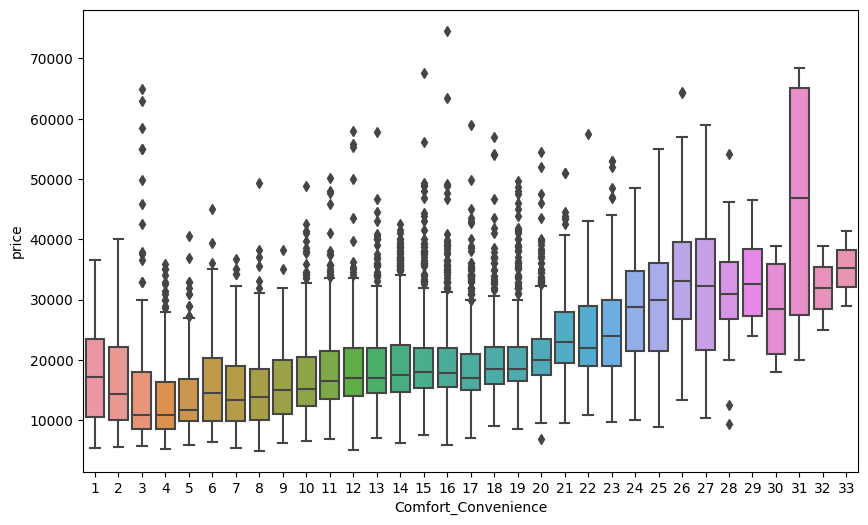

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,
                y="price",
                x="Comfort_Convenience"
               )

<Axes: xlabel='Extras', ylabel='price'>

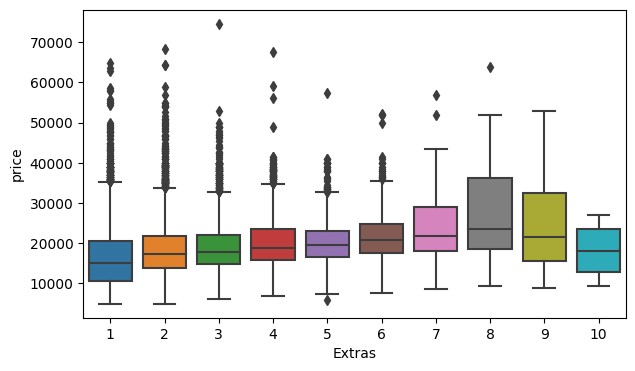

In [50]:
sns.boxplot(data=df,
                y="price",
                x="Extras"
               )

<Axes: xlabel='Entertainment_Media', ylabel='price'>

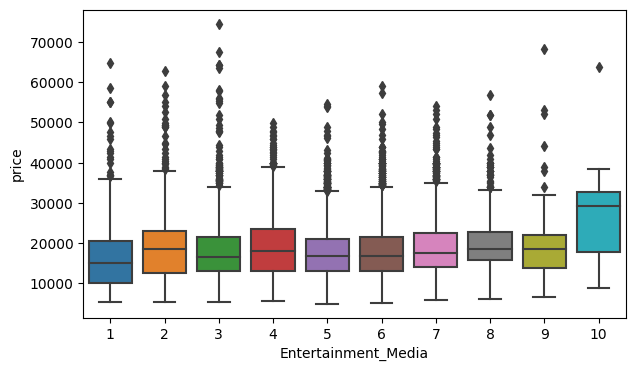

In [51]:
sns.boxplot(data=df,
                y="price",
                x="Entertainment_Media"
               )

<Axes: xlabel='Safety_Security', ylabel='price'>

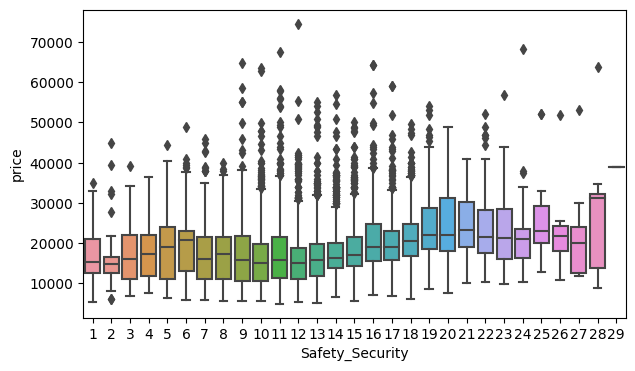

In [52]:
sns.boxplot(data=df,
                y="price",
                x="Safety_Security"
               )

<Axes: xlabel='Inspection_new', ylabel='price'>

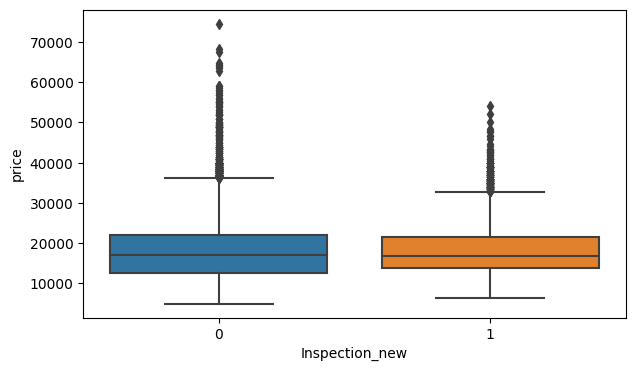

In [53]:
sns.boxplot(data=df,
                y="price",
                x="Inspection_new"
               )

In [54]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [55]:
df.vat.value_counts()

VAT deductible      13426
Price negotiable      816
Name: vat, dtype: int64

In [56]:
df.drop(["vat"], axis = 1,inplace=True)

In [57]:
# you may think of divide it into 2 variables:  1 --> [New, Used ]         2 ---> the other 3 classes
df.Type.value_counts()

Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: Type, dtype: int64

In [58]:
df.Drive_chain.value_counts()

front    14067
4WD        171
rear         4
Name: Drive_chain, dtype: int64

# Modeling

In [59]:
df.describe(include="O").columns

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Entertainment_Media',
       'Extras', 'Paint_Type', 'Upholstery_type', 'Gearing_Type',
       'Drive_chain'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14242 entries, 0 to 15912
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   km                   14242 non-null  float64
 4   Type                 14242 non-null  object 
 5   Fuel                 14242 non-null  object 
 6   Gears                14242 non-null  float64
 7   Comfort_Convenience  14242 non-null  int64  
 8   Entertainment_Media  14242 non-null  object 
 9   Extras               14242 non-null  object 
 10  Safety_Security      14242 non-null  int64  
 11  age                  14242 non-null  float64
 12  Previous_Owners      14242 non-null  float64
 13  hp_kW                14242 non-null  float64
 14  Inspection_new       14242 non-null  int64  
 15  Paint_Type           14242 non-null 

### Let's explore the data more

In [61]:
df.make_model.value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

In [62]:
df.drop(df[df["make_model"] == "Audi A2"].index, axis=0, inplace=True)

In [63]:
from tabulate import tabulate

for column in df.columns:
    if df[column].dtype == 'object':
        counts = df[column].value_counts()
        print(f"Value counts for column '{column}':")
        print(tabulate(counts.reset_index(), headers=['Value', 'Count'], tablefmt='pretty'))
        print()

Value counts for column 'make_model':
+---+----------------+-------+
|   |     Value      | Count |
+---+----------------+-------+
| 0 |    Audi A3     | 2758  |
| 1 | Opel Insignia  | 2417  |
| 2 |    Audi A1     | 2377  |
| 3 |   Opel Astra   | 2305  |
| 4 |   Opel Corsa   | 1994  |
| 5 |  Renault Clio  | 1486  |
| 6 | Renault Espace |  884  |
| 7 | Renault Duster |  20   |
+---+----------------+-------+

Value counts for column 'body_type':
+---+---------------+-------+
|   |     Value     | Count |
+---+---------------+-------+
| 0 |    Sedans     | 7230  |
| 1 | Station wagon | 3405  |
| 2 |    Compact    | 2710  |
| 3 |      Van      |  735  |
| 4 |  Transporter  |  87   |
| 5 |   Off-Road    |  41   |
| 6 |     Coupe     |  25   |
| 7 |  Convertible  |   8   |
+---+---------------+-------+

Value counts for column 'Type':
+---+----------------+-------+
|   |     Value      | Count |
+---+----------------+-------+
| 0 |      Used      | 10172 |
| 1 |      New       | 1369  |
| 2 

In [64]:
# dropping columns with value counts less than 10

df.drop(df[df["body_type"] == "Convertible"].index, axis=0, inplace=True)
df.drop(df[df["Fuel"] == "Electric"].index, axis=0, inplace=True)
df.drop(df[df["Paint_Type"] == "Perl effect"].index, axis=0, inplace=True)
df.drop(df[df["Drive_chain"] == "rear"].index, axis=0, inplace=True)
df.drop(df[df["Extras"] == 10].index, axis=0, inplace=True)

In [65]:
for column in df.columns:
    if df[column].dtype == 'object':
        counts = df[column].value_counts()
        print(f"Value counts for column '{column}':")
        print(tabulate(counts.reset_index(), headers=['Value', 'Count'], tablefmt='pretty'))
        print()

Value counts for column 'make_model':
+---+----------------+-------+
|   |     Value      | Count |
+---+----------------+-------+
| 0 |    Audi A3     | 2743  |
| 1 | Opel Insignia  | 2411  |
| 2 |    Audi A1     | 2376  |
| 3 |   Opel Astra   | 2302  |
| 4 |   Opel Corsa   | 1990  |
| 5 |  Renault Clio  | 1480  |
| 6 | Renault Espace |  884  |
| 7 | Renault Duster |  20   |
+---+----------------+-------+

Value counts for column 'body_type':
+---+---------------+-------+
|   |     Value     | Count |
+---+---------------+-------+
| 0 |    Sedans     | 7216  |
| 1 | Station wagon | 3393  |
| 2 |    Compact    | 2709  |
| 3 |      Van      |  735  |
| 4 |  Transporter  |  87   |
| 5 |   Off-Road    |  41   |
| 6 |     Coupe     |  25   |
+---+---------------+-------+

Value counts for column 'Type':
+---+----------------+-------+
|   |     Value      | Count |
+---+----------------+-------+
| 0 |      Used      | 10140 |
| 1 |      New       | 1368  |
| 2 | Pre-registered | 1029  |
| 3

## Preprocessing

In [66]:
# cat_onehot = ['make_model','body_type', "Fuel", "Paint_Type", "Gearing_Type", "Drive_chain"]
# cat_ordinal = ["Gears", "Previous_Owners", "Inspection_new", "Upholstery_type", "Type"]

# cat_for_Gears = ["5.0", "6.0", "7.0", "8.0"]
# #cat_for_Gears = [5.0, 6.0, 7.0, 8.0 ]
# cat_for_Previous_Owners = ["0.0", "1.0", "2.0", "3.0", "4.0" ]
# cat_for_Inspection_new = ["4.0", "3.0", "2.0", "1.0", "0.0" ]


# cat_for_Upholstery_type = ["Cloth", "Part/Full Leather"]
# cat_for_Type = ["Used", "Employee's car", "Demonstration", "Pre-registered", "New"]


cat_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]


# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [68]:
y = df.price
X = df.drop("price", axis=1)
print(y)
display(X)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15907    39980
15908    39950
15909    39950
15911    39885
15912    39875
Name: price, Length: 14206, dtype: int64


,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

### Evaluation Metrics

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [72]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

# Using Random Forest

In [73]:
price_50K = df[df['price'] < 50000]

y = price_50K.price
X = price_50K.drop("price", axis=1)

In [74]:
X

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

RandomForest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

## RF Pipline

'RF_model__max_depth': 10,
 'RF_model__max_features': 'sqrt'

In [78]:
rf = RandomForestRegressor(bootstrap=True, max_features='sqrt',
                                                 min_samples_leaf=5, min_samples_split=2, n_estimators=100, max_depth=10)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=5))])

In [79]:
pred = pipe_model.predict(X_test)

In [80]:
eval_metric(y_test, pred)

r2_score: 0.9250634144317963 
mae: 1270.4424904988998 
mse: 3649802.1538913366 
rmse: 1910.4455380594698


In [81]:
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [82]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.921
train_r2                                   0.936
test_neg_mean_absolute_error           -1317.837
train_neg_mean_absolute_error          -1214.924
test_neg_mean_squared_error         -3997061.899
train_neg_mean_squared_error        -3281125.735
test_neg_root_mean_squared_error       -1998.106
train_neg_root_mean_squared_error      -1811.359
dtype: float64

test_r2                                    0.945

train_r2                                   0.980

test_neg_mean_absolute_error           -1048.262

train_neg_mean_absolute_error           -615.887

test_neg_mean_squared_error         -2797478.172

train_neg_mean_squared_error         -995958.688

test_neg_root_mean_squared_error       -1671.170

train_neg_root_mean_squared_error       -997.955

dtype: float64

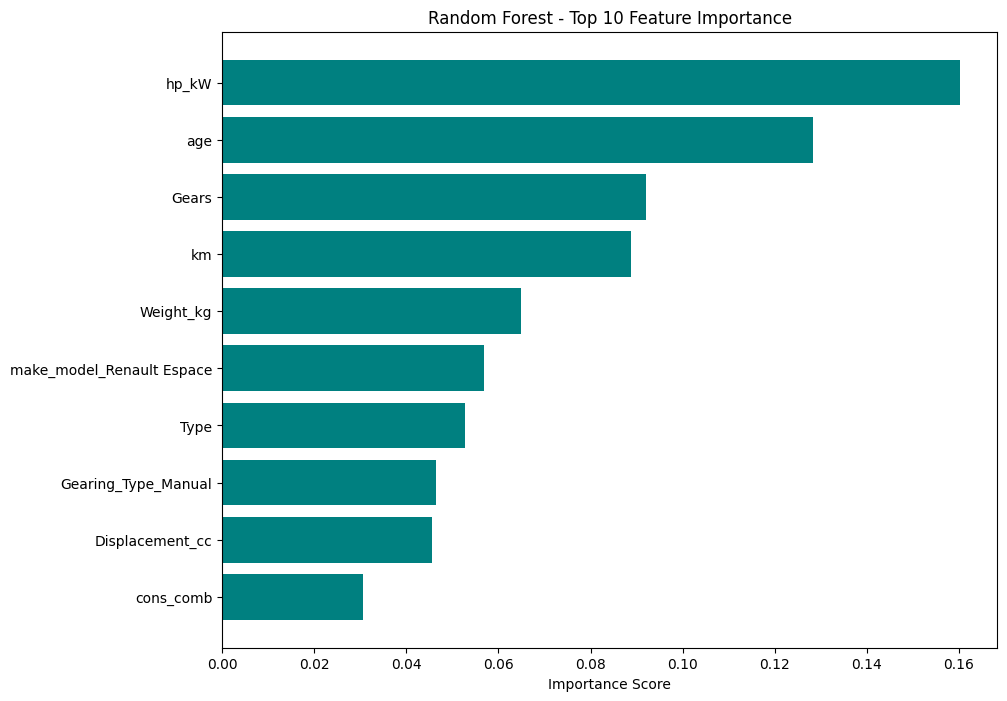

In [83]:
feature_importances = rf.feature_importances_

feature_names = X_train_transformed.columns  # Sort features based on importance

sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:10], importance[:10], color='teal')
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

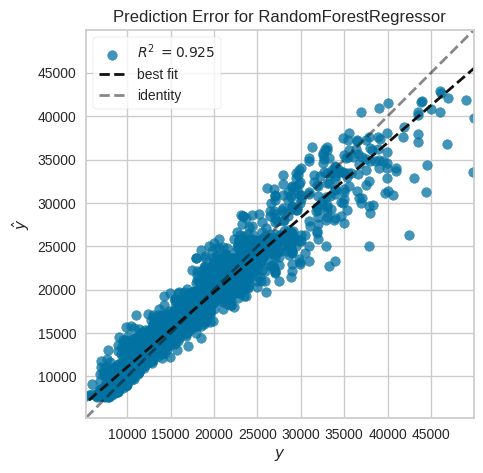

In [84]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(rf)
visualizer.fit(X_train_transformed, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_transformed, y_test) # Evaluate the model on the test data
visualizer.show();

## GridSearch

In [85]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [86]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[128, 200],
             'RF_model__max_features':['sqrt'],
             'RF_model__max_depth':[4, 7, 8, 10], #2, 3, 4,
             #'RF_model__min_samples_split':[2, 3,4],
             #'RF_model__min_samples_leaf': [2,3,4]
             #'RF_model__max_samples':[0.8, 1]
             }


grid_search = GridSearchCV(
pipe_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     'New',
                                                                                                     'Pre-register...
                                                                                                     'Demonstration']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'RF_model__max_depth': [4, 7, 8, 10],
                         'RF_model__max_features': ['sqrt'],
                         'RF_model__n_estimators': [128, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [87]:
grid_search.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 'sqrt',
 'RF_model__n_estimators': 200}

In [88]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.950,0.934
mae,1114.824,1214.329
mse,2570986.648,3200715.898
rmse,1603.430,1789.054


In [89]:
pred = grid_search.predict(X_test)

In [90]:
rf = RandomForestRegressor(random_state=42, max_depth=10,
max_features='sqrt', n_estimators=200)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=200, random_state=42))])

In [91]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.950,0.934
mae,1114.824,1214.329
mse,2570986.648,3200715.898
rmse,1603.430,1789.054


In [92]:
pipe_model["RF_model"].feature_importances_

array([1.20112764e-02, 1.21768054e-02, 1.43857272e-02, 3.38657339e-02,
       1.24213874e-02, 1.34822463e-02, 1.99054866e-04, 4.26591085e-02,
       1.82151478e-03, 4.37395154e-05, 3.71128936e-04, 2.14078280e-03,
       3.01343407e-03, 2.46956612e-04, 2.25031775e-02, 2.77764697e-03,
       4.05137917e-03, 1.14810371e-04, 1.93377037e-02, 1.68959482e-02,
       2.19757666e-02, 3.90150977e-02, 3.90181546e-03, 7.12613992e-04,
       5.45602289e-04, 2.98828443e-04, 3.08891815e-04, 4.21753780e-02,
       1.00830462e-01, 7.54816239e-02, 2.57092124e-02, 3.62492708e-03,
       4.85145197e-03, 9.67957535e-03, 1.22397369e-01, 1.58061463e-03,
       1.80985642e-01, 1.32722148e-03, 4.59452199e-02, 7.06236120e-02,
       3.35095112e-02])

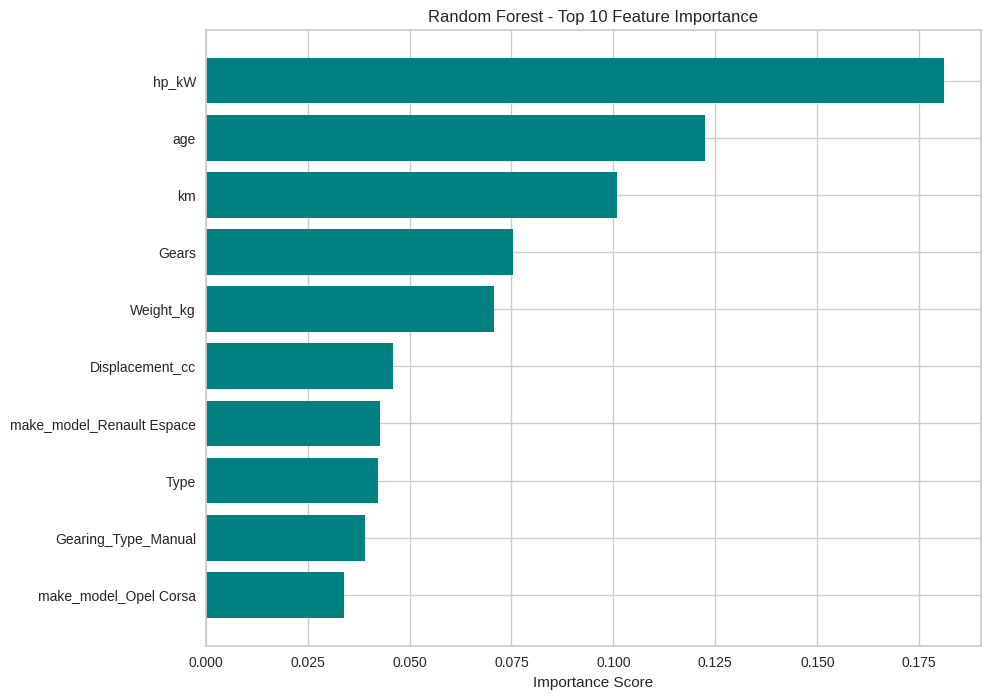

In [93]:
feature_importances = rf.feature_importances_

feature_names = X_train_transformed.columns  # Sort features based on importance

sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:10], importance[:10], color='teal')
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [94]:
sorted_feature_importance[:10]

[('hp_kW', 0.18098564227569103),
 ('age', 0.12239736917881272),
 ('km', 0.10083046162416297),
 ('Gears', 0.07548162392035028),
 ('Weight_kg', 0.07062361201634522),
 ('Displacement_cc', 0.045945219918200754),
 ('make_model_Renault Espace', 0.0426591085305184),
 ('Type', 0.04217537798571322),
 ('Gearing_Type_Manual', 0.039015097665232853),
 ('make_model_Opel Corsa', 0.0338657338952923)]

Selecting most important features

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

## Model building

In [98]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(128, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16257 (63.50 KB)
Trainable params: 16257 (63.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model.fit(X_train_transformed, y_train, batch_size=256, epochs=200)

Epoch 1/200
45/45 [==============================] - 1s 4ms/step - loss: 375246528.0000
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 361384384.0000
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 219416256.0000
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 25282506.0000
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 13414812.0000
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 11204806.0000
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 9849548.0000
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 8925929.0000
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 8231311.0000
Epoch 10/200
45/45 [==============================] - 0s 4ms/step - loss: 7716946.5000
Epoch 11/200
45/45 [==============================] - 0s 3ms/step - loss: 7312572.0000
Epoch 12/200
45/45 [=======================

In [101]:
eval_metric(y_test, model.predict(X_test_transformed))

89/89 [==============================] - 0s 2ms/step
r2_score: 0.9442796789652642 
mae: 1099.273267558132 
mse: 2713869.949985906 
rmse: 1647.3827575842556


In [102]:
eval_metric(y_train, model.predict(X_train_transformed))

355/355 [==============================] - 1s 2ms/step
r2_score: 0.9463720550083307 
mae: 1082.465545425368 
mse: 2733212.762502974 
rmse: 1653.243104477673


### Selecting the most important 7 features, and data transformation.

In [103]:
price_50K = df[df['price'] < 50000]
X_final = price_50K[["hp_kW", "age", "km", "Gears", "Displacement_cc","Weight_kg", "Type"]]
y_final = price_50K["price"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [146]:
X_final.Type.value_counts()

Used              10118
New                1355
Pre-registered     1029
Employee's car      903
Demonstration       759
Name: Type, dtype: int64

In [106]:
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [107]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(

                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [108]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

### Sequential API

In [109]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(128, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1024      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.fit(X_train_transformed, y_train, batch_size=256, epochs=200)

Epoch 1/200
45/45 [==============================] - 1s 3ms/step - loss: 375066464.0000
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 360518048.0000
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 238946736.0000
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 58375792.0000
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 36653032.0000
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 29526498.0000
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 24679218.0000
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 21098646.0000
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 18392998.0000
Epoch 10/200
45/45 [==============================] - 0s 4ms/step - loss: 16405880.0000
Epoch 11/200
45/45 [==============================] - 0s 3ms/step - loss: 14987084.0000
Epoch 12/200
45/45 [==================

In [112]:
eval_metric(y_test, model.predict(X_test_transformed))

89/89 [==============================] - 0s 2ms/step
r2_score: 0.8785278332043266 
mae: 1753.2674778144856 
mse: 5916327.420671994 
rmse: 2432.350184630493


In [113]:
eval_metric(y_train, model.predict(X_train_transformed))

355/355 [==============================] - 1s 2ms/step
r2_score: 0.8675062672598114 
mae: 1837.2192890442288 
mse: 6752702.557097721 
rmse: 2598.596266659698


In [114]:
# pickle the model
import pickle
pickle.dump(model, open("model.pkl", "wb"))

In [115]:
# load the model
final_model = pickle.load(open("model.pkl", "rb"))

In [116]:
final_model.predict(X_test_transformed)

89/89 [==============================] - 0s 2ms/step


array([[17577.4  ],
       [13449.232],
       [16677.293],
       ...,
       [11330.511],
       [ 9569.866],
       [14753.601]], dtype=float32)

Functional API

In [117]:
from keras import layers
import keras

input_dim = X_train_transformed.shape[1]
inputs = keras.Input(shape=(input_dim, ), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
hidden_1 = layers.Dense(32, activation="relu")(features)
outputs = layers.Dense(1)(hidden_1)
model = keras.Model(inputs=inputs, outputs=outputs)

In [118]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt,
 loss=["mean_squared_error", "categorical_crossentropy"],
 metrics=[["mean_absolute_error"]])

In [119]:
model.fit(X_train_transformed, y_train, batch_size=256, epochs=200)

Epoch 1/200
45/45 [==============================] - 1s 3ms/step - loss: 375328192.0000 - mean_absolute_error: 18010.7578
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 371974848.0000 - mean_absolute_error: 17929.6836
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 357264832.0000 - mean_absolute_error: 17584.9805
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 320499520.0000 - mean_absolute_error: 16704.5879
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 257239408.0000 - mean_absolute_error: 15043.1260
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 180567040.0000 - mean_absolute_error: 12572.5049
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 116436728.0000 - mean_absolute_error: 9777.0322
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 80711896.0000 - mean_absolute_error: 7921.2427
Epoch 9/200
45/45 [========

In [120]:
eval_metric(y_test, model.predict(X_test_transformed))

89/89 [==============================] - 0s 2ms/step
r2_score: 0.8303594933630174 
mae: 2188.6950748226814 
mse: 8262376.538991788 
rmse: 2874.4349947410165


In [121]:
eval_metric(y_train, model.predict(X_train_transformed))

355/355 [==============================] - 1s 2ms/step
r2_score: 0.8112058086415578 
mae: 2322.1145173156056 
mse: 9622123.193187457 
rmse: 3101.954737449832


It seems like the deep learning model is not performing well.

### Random Forest

In [122]:
rf = RandomForestRegressor(bootstrap=True, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=2,
                           n_estimators=100, max_depth=10)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=5))])

In [123]:
pred = pipe_model.predict(X_test)

In [124]:
eval_metric(y_test, pred)

r2_score: 0.9133314928305203 
mae: 1420.4918995756807 
mse: 4221207.861863577 
rmse: 2054.5578263615694


In [125]:
eval_metric(y_train, pipe_model.predict(X_train))

r2_score: 0.9176578338218067 
mae: 1403.0866771293051 
mse: 4196667.605393788 
rmse: 2048.576970824818


In [126]:
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [127]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.902
train_r2                                   0.917
test_neg_mean_absolute_error           -1513.673
train_neg_mean_absolute_error          -1407.804
test_neg_mean_squared_error         -4973726.646
train_neg_mean_squared_error        -4220497.425
test_neg_root_mean_squared_error       -2229.126
train_neg_root_mean_squared_error      -2054.351
dtype: float64

## Final model

We are going to use Random Forest as the final model. But why Random Forest, instead of deep learning?
<br>
Since, we have high colenriality in the dataset, deep learning models are prone to hgigh colenriality data.
<br>
While, tree based models aren't prone to high colenriality.

In [136]:
rf_final = RandomForestRegressor(bootstrap=True, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=2,
                           n_estimators=100, max_depth=10)

operations = [("encoder", column_trans), ("RF_model", rf_final)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_final, y_final)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=5))])

### Using Pickle to save the model

In [143]:
# pickle the model
import pickle
pickle.dump(pipe_model, open("model.pkl", "wb"))

In [139]:
# load the model
final_model = pickle.load(open("model.pkl", "rb"))

# TPOT predict

TPOT is a Python library for hyperparameter optimization, and AutoML
<br>
https://epistasislab.github.io/tpot/

In [130]:
# !pip install --upgrade tpot

In [131]:
#pip install deap update_checker tqdm stopit xgboost

In [132]:
# pip install tpot
# !pip install scikit-mdr skrebate
!pip install torch

In [133]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=6f4e941445e529f8cd5f48d50dade8eee5e75bde03a53e524b00abc04704a6a6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
ERROR: Operation cancelled by user


In [134]:
from tpot import TPOTRegressor

ModuleNotFoundError: ignored

In [ ]:
pipeline_optimizer = TPOTRegressor(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train_transformed, y_train)
print(pipeline_optimizer.score(X_test_transformed, y_test))

After 25 min, we have got this resut (Without removing):
<br>
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=100)

-3178224.7544853725

# Lazy Predcit

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.pipeline import Pipeline

In [ ]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

In [ ]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [ ]:
linear = LinearRegression()
linear.fit(X_train_transformed, y_train)

In [ ]:
eval(linear, X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
y_pred = linear.predict(X_test_transformed)
y_pred

In [ ]:
scoring = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [ ]:
model = LinearRegression()

lin_scores = cross_validate(model,
                        X_train_transformed,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
#Creating a dataframe
pd.DataFrame(lin_scores)

In [ ]:
pd.DataFrame(lin_scores).iloc[:, 2:].mean()